In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import corner
import emcee

In [3]:
def model(pars, x):
    return pars[0] * x + pars[1]

In [4]:
def simple_lnprior(pars):
    if -10 < pars[0] < 10 and -10 < pars[1] < 10 and -10 < pars[2] < 10:
        return 0.
    else:
        return -np.inf

In [5]:
def lnprior(pars, mm=False):
    if -10 < pars[0] < 10 and -10 < pars[1] < 10 and -10 < pars[2] < 10 \
            and -10 < pars[3] < 10:
        return 0.
    return -np.inf

In [6]:
def lnprob(pars, x, y, yerr):
    return lnprior(pars) + lnlike(pars, x, y, yerr)

In [7]:
def simple_lnlike(pars, x, y, yerr):
    invsig2 = 1./(yerr**2 + np.exp(2*pars[2]))
    model_y = model(pars, x)
    return -.5*np.sum((y-model_y)**2*invsig2 - np.log(invsig2))

In [20]:
def lnlike(pars, x, y, yerr):
    #invsig2 = 1./(yerr**2 + (pars[2])**2 + (pars[3]*y)**2)  # modelling as sigma, not variance
    invsig2 = 1./(yerr**2 + (pars[2] + pars[3]*y)**2)  # modelling as sigma, not variance
    model_y = model(pars, x)
    return -.5*np.sum((y-model_y)**2*invsig2 - np.log(invsig2))

params =  -0.525509606298 2.88909102256


/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


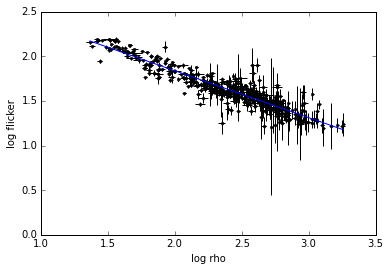

In [9]:
# load data
f, ferr, r, rerr = np.genfromtxt("../data/flickers.dat").T

# fit a line
AT = np.vstack((r, np.ones_like(r)))
ATA = np.dot(AT, AT.T)
m, c = np.linalg.solve(ATA, np.dot(AT, f))
print("params = ", m, c)

# plot data with best fit line
xs = np.linspace(min(r), max(r), 100)
ys = m * xs + c
plt.errorbar(r, f, xerr=rerr, yerr=ferr, fmt="k.", capsize=0)
plt.plot(xs, ys)
plt.ylabel("log flicker")
plt.xlabel("log rho")

In [43]:
pars_init = [m, c, .06, 0.]
print(lnlike(pars_init, r, f, ferr)) # check the lhf works

874.396726885


In [44]:
ndim, nwalkers = len(pars_init), 36
pos = [pars_init + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]  # initialisation
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(r, f, ferr))
sampler.run_mcmc(pos, 100000)  # run MCMC

(array([[ -5.22119410e-01,   2.87996844e+00,   4.41447963e-02,
           1.24136542e-02],
        [ -5.46161603e-01,   2.93703942e+00,   1.10983404e-01,
          -2.53681134e-02],
        [ -5.16833613e-01,   2.86320158e+00,   9.76526779e-03,
           3.26917326e-02],
        [ -5.20596339e-01,   2.86917458e+00,   3.60082518e-02,
           1.65410124e-02],
        [ -5.02990805e-01,   2.84453464e+00,   6.73794168e-02,
          -2.19305287e-03],
        [ -5.16142423e-01,   2.86278342e+00,  -1.18421793e-02,
           4.88473569e-02],
        [ -5.09333974e-01,   2.84919755e+00,   2.24058086e-02,
           2.72091495e-02],
        [ -5.25076975e-01,   2.88858968e+00,   5.26676592e-02,
           4.99253585e-03],
        [ -5.26757449e-01,   2.90279025e+00,   6.37388457e-02,
           1.02694206e-03],
        [ -5.25973921e-01,   2.89489702e+00,   5.75117640e-02,
           3.48287129e-03],
        [ -5.13436838e-01,   2.86177608e+00,   7.96841054e-02,
          -9.44989520e-03],

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


ERROR! Session/line number was not unique in database. History logging moved to new session 59


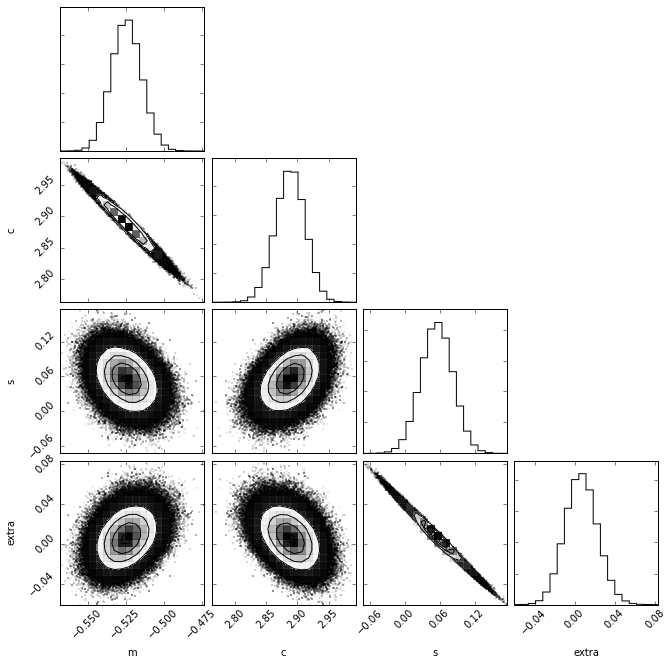

In [45]:
samples = sampler.chain[:, 50000:, :].reshape((-1, ndim))  # cut off burn in and flatten chains
m1, c1, s1, extra = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
fig = corner.corner(samples, labels=["m", "c", "s", "extra"])

Plot the data with the results

In [46]:
print(s1[0])


0.0550652254213
